In [1]:
import pandas as pd
from minepy import MINE
from joblib  import Parallel,delayed
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def mic(x,y):
    '''输入为dataframe'''
    if type(x) == pd.DataFrame:
        x = x.prob.values.ravel()
        y = y.prob.values.ravel()
    m = MINE(est ='mic_e')
    m.compute_score(x,y)
    return m.mic()

def cal_raw(x,pred_list):
    result = Parallel(n_jobs=len(pred_list),verbose=10)(delayed(mic)(x,y) for y in pred_list)
    return result

def cal_matrix(pred_list):
    result = Parallel(n_jobs=len(pred_list),verbose=10)(delayed(cal_raw)(x,pred_list) for x in pred_list)
    return np.array(result)

def plot_mic_matrix(mic_matrix,ticks):
    plt.figure(figsize=(16,16))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.heatmap(mic_matrix,linewidths=1,vmax=1.0,
            square=True,linecolor='white',annot=True,xticklabels=ticks,yticklabels =ticks)

In [13]:
xgb_pred0829 = pd.read_csv('../3.predict_test/models_for_blending/xgb_pred0829/voting_pred.txt')
gbc_pred0819 = pd.read_csv('../3.predict_test/models_for_blending/gbc_pred0819/gbc_pred.csv')
lgb_pred_en_8079 = pd.read_csv('../3.predict_test/models_for_blending/lgb_pred_en_8079/pred.txt')
lgb_pred_0819 = pd.read_csv('../3.predict_test/models_for_blending/lgb_pred_0819/lgb_pred.txt')
lgb_pred_080971 = pd.read_csv('../3.predict_test/models_for_blending/lgb_pred_080971/lgb_pred.txt')
# voting_pred_08121 = pd.read_csv('./preds_for_bagging/voting_pred_08121.txt')
lgb0_pred_0817 = pd.read_csv('../3.predict_test/models_for_blending/lgb0_pred_0817/lgb0_pred')
xgb_pred_330_08242 = pd.read_csv('../3.predict_test/models_for_blending/xgb_pred_330_08242/xgb_pred_330.txt')
xgbtest1_pred_083046 = pd.read_csv('../3.predict_test/models_for_blending/xgb_pred0829/blending_pred.txt')
semi_pred1 = pd.read_csv('../3.predict_test/models_for_blending/semi_learning/pred1.txt')
semi_pred2 = pd.read_csv('../3.predict_test/models_for_blending/semi_learning/pred2.txt')
tes1_pred = pd.read_csv('../3.predict_test/tes1_pred.txt')

In [16]:
pred_list = [xgb_pred0829,gbc_pred0819,lgb_pred_en_8079,
              lgb_pred_0819,lgb_pred_080971,lgb0_pred_0817,
              xgb_pred_330_08242,xgbtest1_pred_083046,semi_pred1,semi_pred2,tes1_pred]

file_names = ['xgb_pred0829','gbc_pred0819','lgb_pred_en_8079',
              'lgb_pred_0819','lgb_pred_080971','lgb0_pred_0817',
              'xgb_pred_330_08242','xgbtest1_pred_083046','semi_pred1','semi_pred2','tes1_pred']

[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   2 out of  11 | elapsed:   41.7s remaining:  3.1min
[Parallel(n_jobs=11)]: Done   4 out of  11 | elapsed:   42.0s remaining:  1.2min
[Parallel(n_jobs=11)]: Done   6 out of  11 | elapsed:   42.2s remaining:   35.1s
[Parallel(n_jobs=11)]: Done   8 out of  11 | elapsed:   42.3s remaining:   15.9s
[Parallel(n_jobs=11)]: Done  11 out of  11 | elapsed:   43.1s finished


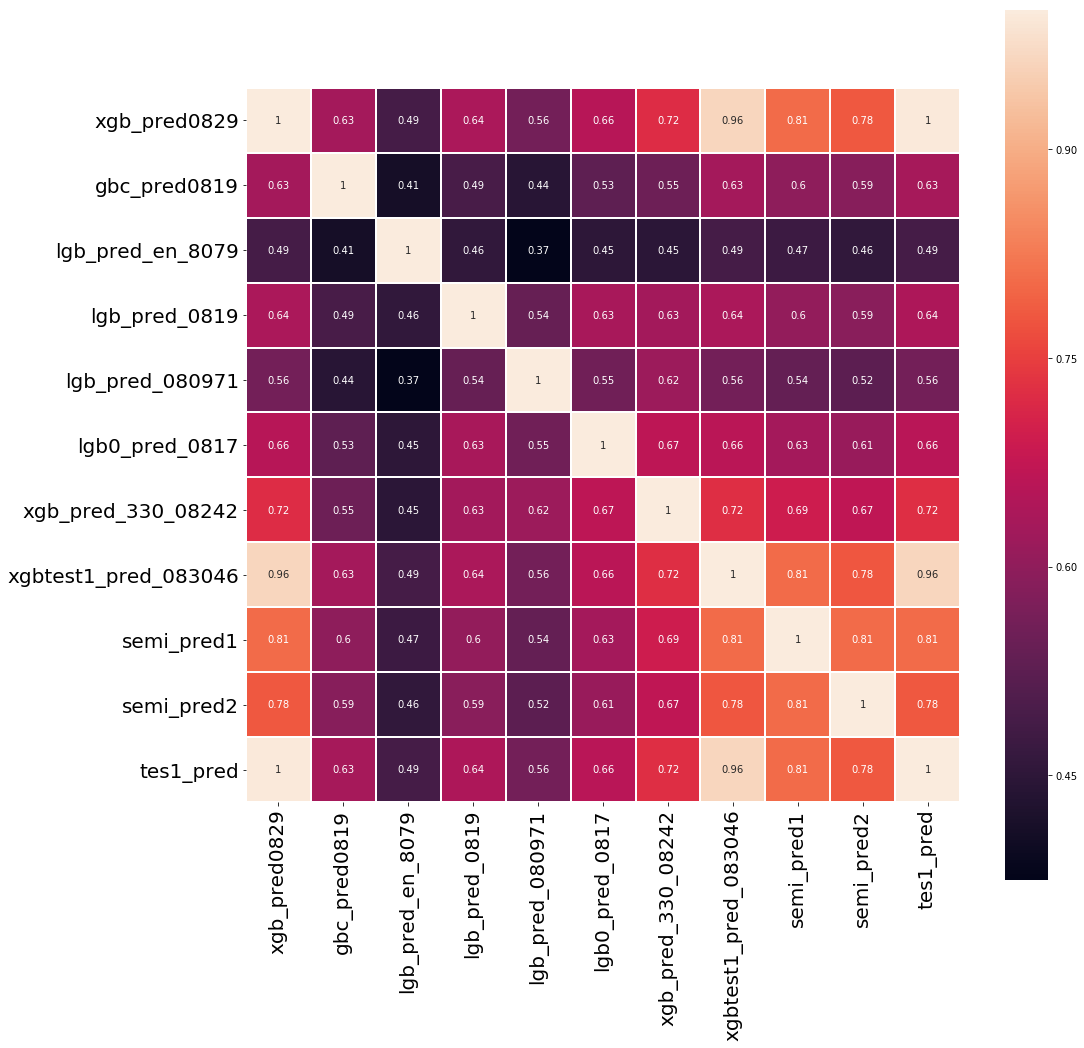

In [17]:
mic_matrix = cal_matrix(pred_list)
plot_mic_matrix(mic_matrix,file_names)

# test1

In [10]:
pred = pd.DataFrame()
pred['id'] = xgb_pred0829.id
pred['prob'] = (3*xgb_pred0829.prob + gbc_pred0819.prob +
    lgb_pred_en_8079.prob + lgb_pred_0819.prob +
    lgb_pred_080971.prob )
pred.to_csv('tes1_pred.txt',index=False) 

In [ ]:
# 0.82382684197823

# test2

In [13]:
pred = pd.DataFrame()
pred['id'] = xgb_pred0829.id
pred['prob'] = (xgbtest1_pred_083046.prob + gbc_pred0819.prob +
    lgb_pred_0819.prob + lgb0_pred_0817.prob )
pred.to_csv('tes2_pred.txt',index=False) 

In [14]:
# 0.8248

# test3

In [16]:
pred = pd.DataFrame()
pred['id'] = xgb_pred0829.id
pred['prob'] = (xgbtest1_pred_083046.prob.rank() + gbc_pred0819.prob.rank() +
    lgb_pred_0819.prob.rank() + lgb0_pred_0817.prob.rank() )
pred.to_csv('tes3_pred.txt',index=False) 

In [8]:
# 0.8253103065346

# test4

In [10]:
pred = pd.DataFrame()
pred['id'] = xgb_pred0829.id
pred['prob'] = (xgbtest1_pred_083046.prob.rank() + gbc_pred0819.prob.rank() +
    lgb_pred_0819.prob.rank() + lgb0_pred_0817.prob.rank() + xgb_pred_330_08242.prob.rank())
pred.to_csv('tes4_pred.txt',index=False) 

# test5

In [ ]:
pred = pd.DataFrame()
pred['id'] = xgb_pred0829.id
pred['prob'] = (xgbtest1_pred_083046.prob.rank() + gbc_pred0819.prob.rank() +
    lgb_pred_0819.prob.rank() + lgb0_pred_0817.prob.rank() + xgb_pred_330_08242.prob.rank())
pred.to_csv('tes4_pred.txt',index=False) 

# test6

In [8]:
pred = pd.DataFrame()
pred['id'] = xgb_pred0829.id
pred['prob'] = (xgbtest1_pred_083046.prob.rank() + gbc_pred0819.prob.rank() +
    lgb_pred_0819.prob.rank() + xgb_pred_330_08242.prob.rank() + semi_pred1.prob.rank())
pred.to_csv('tes6_pred.txt',index=False) 

In [9]:
# 0.82608480361357

# test7

In [18]:
pred = pd.DataFrame()
pred['id'] = xgb_pred0829.id
pred['prob'] = (tes1_pred.prob.rank() + gbc_pred0819.prob.rank() +
    lgb_pred_0819.prob.rank() + xgb_pred_330_08242.prob.rank() + semi_pred2.prob.rank())
pred.to_csv('tes7_pred.txt',index=False) 

In [ ]:
0.8260